$\chi^2$ Example
================

In [30]:
%matplotlib inline
import pfunk
import matplotlib.pyplot as plt
import numpy as np

In [17]:
fresco_path = './48Ca_elastic_new.in'
fresco_names = ['p1', 'p2', 'p3', 'p4', ('p5', 'p5'), ('p6', 'p6'), 'p4']
fresco_positions = [54, 55, 56, 57, (58, 66), (59, 67), 65]
elastic_data_path = '48Ca_p_p.dat'

In [18]:
model = pfunk.model.Model(fresco_path, fresco_names, fresco_positions)
model.create_elastic_likelihood('fort.201', elastic_data_path)
model.create_likelihood()
model.x0 = model.fresco.x0

In [19]:
fit = pfunk.model_fit.MAPFit(model, lnlike=True, percent_range=5.0)

The initial logprob value is  342.2302664908259


In [20]:
fit.run_anneal(max_iter=1000)

 At minimum 0.0744 accepted 1 iteration 3  Total Accepted : 11

In [32]:
fit.results.x

array([51.42176703,  1.16841407,  0.67832041,  0.5182274 ,  1.3139269 ,
        0.60787394,  7.54261164])

In [27]:
model.run_fresco(np.asarray(model.x0))
cs_orig = pfunk.fresco_classes.read_cross('fort.201')
model.run_fresco(fit.results.x)
cs = pfunk.fresco_classes.read_cross('fort.201')
d = model.likelihood[0].data

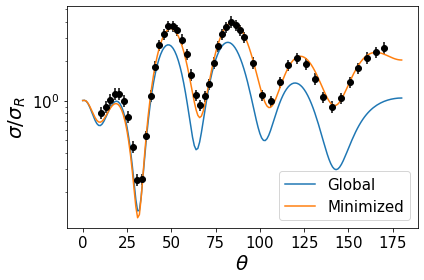

In [38]:
plt.plot(cs_orig.theta, cs_orig.sigma, label='Global', lw=1.5)
plt.plot(cs.theta, cs.sigma, label='Minimized', lw=1.5)
plt.errorbar(d.theta, d.sigma, d.erry, fmt='o', color='k')
plt.yscale('log')
plt.legend(fontsize=15)
plt.xticks(fontsize=15.0)
plt.yticks(fontsize=15.0)
plt.xlabel('$\\theta$', fontsize=20.0)
plt.ylabel('$\sigma/ \sigma_R$', fontsize=20.0)
plt.tight_layout()